# Neural Networks [Feel Free to try other available neural Nerworks available on "skitlearn"


The discrepancy between the high actual values and low predictions by the neural network model might be due to several reasons:

Underfitting: The model may be underfitting the data, meaning it is too simple to capture the underlying trend of the data. This could be due to the choice of architecture (number of layers, number of neurons), lack of complexity, or the features used for training not capturing the patterns effectively.

Data Distribution: If the data is not normalized or standardized, neural networks can have difficulty learning especially if the scales of the input features vary widely.

Outliers or Noisy Data: Outliers can heavily influence neural network performance. If the dataset has extreme values that do not represent the general distribution of the data, the neural network might not predict these values correctly.

Overfitting to Other Data: If the model has overfitted to some datasets and not others, it might fail to generalize well across all datasets.

Model Parameters: Parameters such as the learning rate, activation function, or the optimization algorithm could be set in a way that does not allow the model to learn the higher values effectively.

Training Process: The number of epochs, batch size, or the convergence criteria could affect training. If the model has not been trained for enough iterations or the training process is not stable, the predictions can be inaccurate.

Insufficient Data: If the training data does not include enough examples of the higher values of CO2, the model may not learn to predict those values correctly.

Its also important to note that using a single model to predict multiple datasets can be challenging, as each dataset might have different underlying distributions and relationships between variables. It might be beneficial to train separate models for each dataset or to incorporate dataset identification as part of the input to the model to help it learn dataset-specific representations.

C:\Users\schowdho\AppData\Local\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


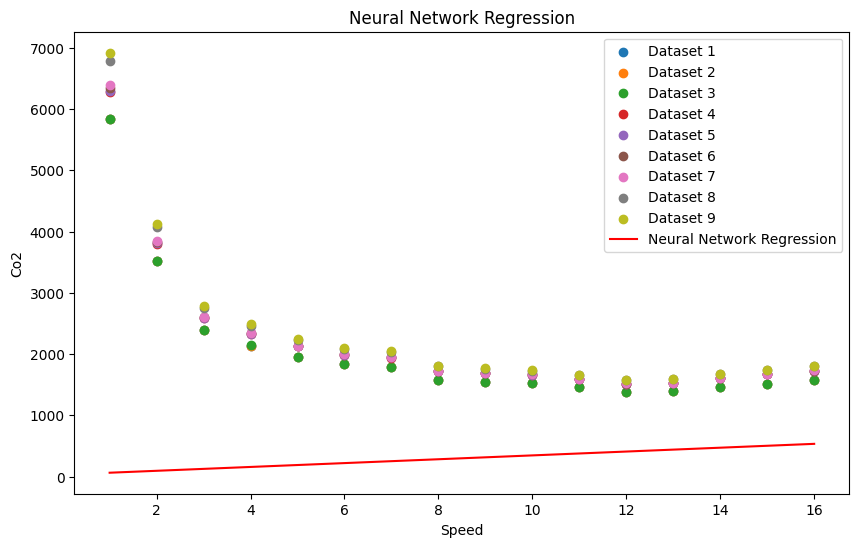

 Speed  Predicted Co2
     1      63.130290
     2      94.546879
     3     125.972442
     4     157.398005
     5     188.823568
     6     220.249130
     7     251.674693
     8     283.100256
     9     314.525819
    10     345.951381
    11     377.376944
    12     408.802507
    13     440.228070
    14     471.653632
    15     503.079195
    16     534.504758


In [1]:
#Not Sure about the plot

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor

# Assuming you have a list of Excel file paths
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
rates_datasets = []

# Read datasets from Excel files and assuming 'Co2' column for rates
for file_path in file_paths:
    df = pd.read_excel(file_path)
    rates_datasets.append(df['Co2'].values)

# Define the data for all datasets
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Combine data from all datasets
all_speed = np.concatenate([speed] * len(rates_datasets))
all_rates = np.concatenate(rates_datasets)

# Create and fit the Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
nn_model.fit(all_speed, all_rates)

# Predict using the model
nn_predictions = nn_model.predict(all_speed)

# Plot the results
plt.figure(figsize=(10, 6))
for i, rates_dataset in enumerate(rates_datasets):
    plt.scatter(speed, rates_dataset, label=f'Dataset {i+1}')
plt.plot(speed, nn_model.predict(speed), color='red', label='Neural Network Regression')
plt.title('Neural Network Regression')
plt.xlabel('Speed')
plt.ylabel('Co2')
plt.legend()
plt.show()

# Predict CO2 values for speed using the model and create a DataFrame with the predictions
predicted_co2_values = nn_model.predict(speed)
predicted_df = pd.DataFrame({
    'Speed': speed.flatten(),
    'Predicted Co2': predicted_co2_values.flatten()
})

# Print the DataFrame
print(predicted_df.to_string(index=False))


C:\Users\schowdho\AppData\Local\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


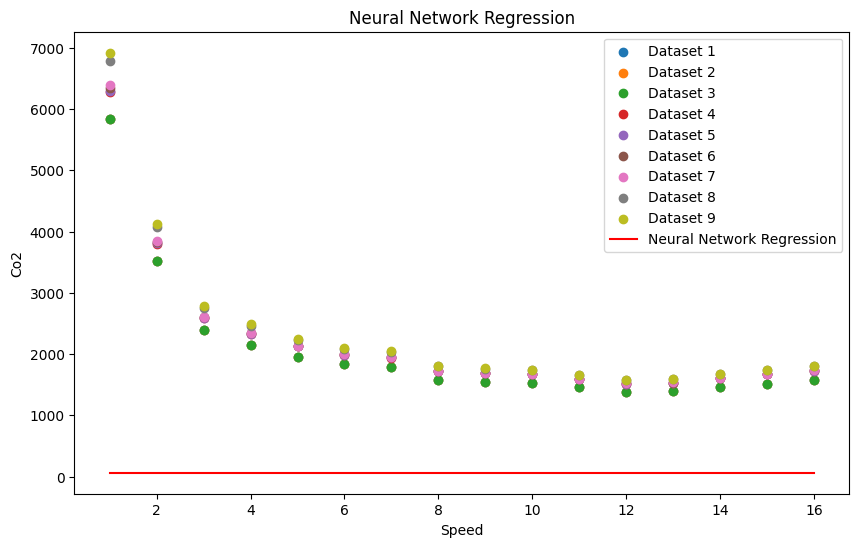

 Speed  Predicted Co2
     1      62.061929
     2      62.061792
     3      62.061628
     4      62.061435
     5      62.061208
     6      62.060944
     7      62.060636
     8      62.060279
     9      62.059866
    10      62.059389
    11      62.058836
    12      62.058197
    13      62.057458
    14      62.056603
    15      62.055613
    16      62.054467


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming you have a list of Excel file paths
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
rates_datasets = []

# Read datasets from Excel files and assuming 'Co2' column for rates
for file_path in file_paths:
    df = pd.read_excel(file_path)
    rates_datasets.append(df['Co2'].values)

# Define the data for all datasets
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Combine data from all datasets
all_speed = np.concatenate([speed] * len(rates_datasets))
all_rates = np.concatenate(rates_datasets)

# Create a more complex Neural Network model with a pipeline including scaling
nn_model = make_pipeline(
    StandardScaler(),
    MLPRegressor(
        hidden_layer_sizes=(100, 50),  # Two layers with 100 and 50 neurons
        activation='tanh',             # Using the tanh activation function
        solver='adam',
        alpha=0.001,                   # L2 regularization term
        learning_rate_init=0.001,      # Initial learning rate
        max_iter=1000,                 # More iterations
        random_state=1                 # Set a random state for reproducibility
    )
)

# Train the model
nn_model.fit(all_speed, all_rates)

# Predict using the model
nn_predictions = nn_model.predict(all_speed)

# Plot the results
plt.figure(figsize=(10, 6))
for i, rates_dataset in enumerate(rates_datasets):
    plt.scatter(speed, rates_dataset, label=f'Dataset {i+1}')
plt.plot(speed, nn_model.predict(speed), color='red', label='Neural Network Regression')
plt.title('Neural Network Regression')
plt.xlabel('Speed')
plt.ylabel('Co2')
plt.legend()
plt.show()

# Predict CO2 values for speed using the model and create a DataFrame with the predictions
predicted_co2_values = nn_model.predict(speed)
predicted_df = pd.DataFrame({
    'Speed': speed.flatten(),
    'Predicted Co2': predicted_co2_values.flatten()
})

# Print the DataFrame
print(predicted_df.to_string(index=False))
